In [2]:
import pandas as pd

In [3]:
url = 'https://github.com/mattharrison/datasets/raw/master/data/siena2018-pres.csv'
pres = pd.read_csv(url,index_col=0)
pres.head()

,Seq.,President,Party,Bg,Im,Int,IQ,L,WR,AC,...,PL,RC,CAp,HE,EAp,DA,FPA,AM,EV,O
1,1,George Washington,Independent,7,7,1,10,1,6,2,...,18,1,1,1,1,2,2,1,2,1
2,2,John Adams,Federalist,3,13,4,4,24,14,31,...,28,17,4,13,15,19,13,16,10,14
3,3,Thomas Jefferson,Democratic-Republican,2,2,14,1,8,5,14,...,5,5,7,20,4,6,9,7,5,5
4,4,James Madison,Democratic-Republican,4,6,7,3,16,15,6,...,9,10,6,14,7,11,19,11,8,7
5,5,James Monroe,Democratic-Republican,9,14,11,18,6,16,7,...,12,8,11,9,9,10,5,6,9,8


In [4]:
def transform(df):
    def change_type(df_):
        cols = df_.select_dtypes('int64').columns
        return (df_.astype({col:'uint8' for col in cols})
        )
    return (df
            .rename(columns = {k:v.replace(' ','_') for k,v in
                                     {'Bg': 'Background',
               'PL': 'Party leadership', 'CAb': ' Communication ability',
               'RC': 'Relations with Congress', 'CAp': 'Court appointments',
               'HE': 'Handling of economy', 'L': 'Luck',
               'AC': 'Ability to compromise', 'WR': 'Willing to take risks',
               'EAp': 'Executive appointments', 'OA': 'Overall ability',
               'Im': 'Imagination', 'DA': 'Domestic accomplishments',
               'Int': 'Integrity', 'EAb': 'Executive ability',
               'FPA': 'Foreign policy accomplishments',
               'LA': 'Leadership ability',
               'IQ': 'Intelligence', 'AM': 'Avoid crucial mistakes',
               'EV': "Experts' view", 'O': 'Overall'}
                               .items()
                               } )

            .pipe(change_type)
            .assign(Average_Rank = lambda df_ :df_.select_dtypes('uint8')
                    .sum(axis=1)
                    .rank(method='dense').astype('uint8'))
    )

In [19]:

sort_col = 'Overall'
require_cols = ['President',sort_col]
(pres.pipe(transform)).sort_values(sort_col)[require_cols].head()  ,'*'*50 , (pres.pipe(transform)).sort_values(sort_col)[require_cols].tail()

(                President  Overall
 1       George Washington        1
 31  Franklin D. Roosevelt        2
 16        Abraham Lincoln        3
 25     Theodore Roosevelt        4
 3        Thomas Jefferson        5,
 '**************************************************',
             President  Overall
 14    Franklin Pierce       40
 28  Warren G. Harding       41
 44       Donald Trump       42
 15     James Buchanan       43
 17     Andrew Johnson       44)

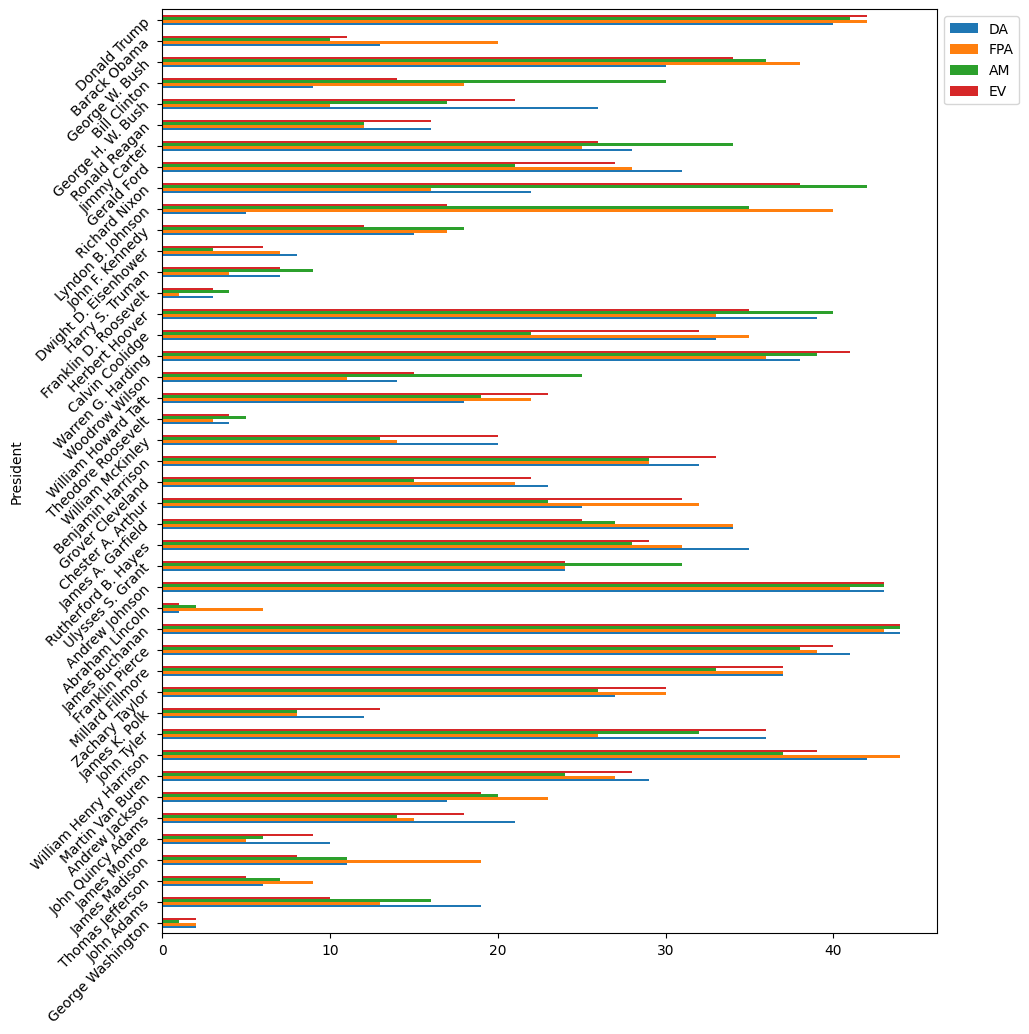

In [6]:
(pres
 .set_index('President')
 .drop('Seq.' , axis=1)
 .iloc[:,-5:-1]
 ).plot(kind='barh',rot=45,figsize=(10,12)).legend(bbox_to_anchor =(1,1))




In [40]:
colors = []
def set_colors(df):
   for col in df.columns:
        if 'George' in col:
            colors.append('gray')
        else:
            colors.append('blue')

        return df




In [41]:
(pres
 .pipe(transform)
.set_index('President')
.iloc[:,-5:-1]
.T
.pipe(set_colors)
.plot(figsize=(15,23),color= colors)
 )

AttributeError: 'NoneType' object has no attribute 'plot'